In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Shylesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)


Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


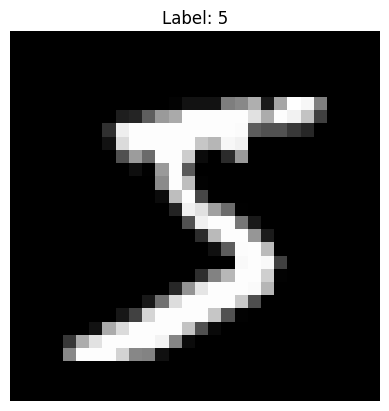

In [5]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [8]:
print("Reshaped training images:", x_train.shape)
print("Reshaped test images:", x_test.shape)

Reshaped training images: (60000, 28, 28, 1)
Reshaped test images: (10000, 28, 28, 1)


In [9]:
print("New training shape:", x_train.shape)
print("New test shape:", x_test.shape)


New training shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


In [10]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


In [11]:
loss = 'sparse_categorical_crossentropy'


In [12]:
print(loss)

sparse_categorical_crossentropy


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\Shylesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
input_shape=(28,28,1)


In [16]:
Conv2D(32, (3,3), activation='relu')


<Conv2D name=conv2d_2, built=False>

In [17]:
MaxPooling2D(2,2)


<MaxPooling2D name=max_pooling2d_2, built=True>

In [18]:
Conv2D(64, (3,3), activation='relu')


<Conv2D name=conv2d_3, built=False>

In [19]:
Flatten()


<Flatten name=flatten_1, built=False>

In [20]:
Dense(128, activation='relu')


<Dense name=dense_2, built=False>

In [21]:
Dense(10, activation='softmax')


<Dense name=dense_3, built=False>

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9523 - loss: 0.1556 - val_accuracy: 0.9833 - val_loss: 0.0498
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9889 - val_loss: 0.0323
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9878 - val_loss: 0.0334
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9894 - val_loss: 0.0341
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9892 - val_loss: 0.0302
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9911 - val_loss: 0.0316
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9908 - val_loss: 0.0295
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9966 - loss: 0.0099 - 

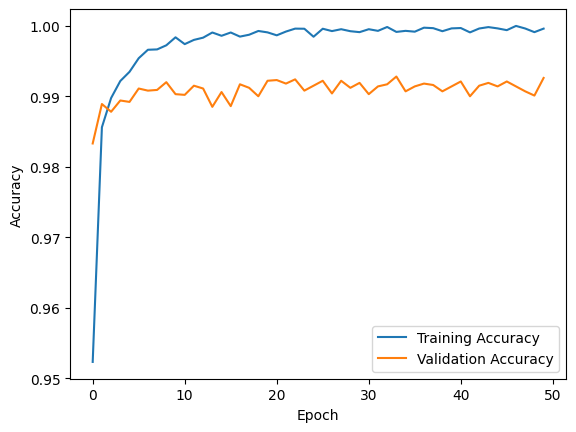

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
model.save("digit_model.h5")


In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0609
Test Loss: 0.06086651608347893
Test Accuracy: 0.9926000237464905


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


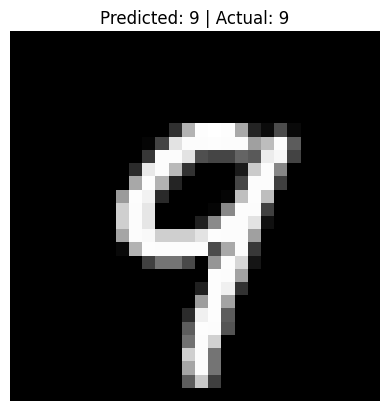

In [28]:
import numpy as np
import matplotlib.pyplot as plt

index = 12  # any index from test set
prediction = model.predict(x_test[index].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_digit} | Actual: {y_test[index]}")
plt.axis('off')
plt.show()


In [29]:
for i in range(5):
    pred = np.argmax(model.predict(x_test[i].reshape(1,28,28,1)))
    print(f"Image {i}: Predicted={pred}, Actual={y_test[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 0: Predicted=7, Actual=7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image 1: Predicted=2, Actual=2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image 2: Predicted=1, Actual=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image 3: Predicted=0, Actual=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 4: Predicted=4, Actual=4


In [30]:
from tensorflow.keras.models import load_model

model = load_model("digit_model.h5")


In [31]:
import cv2
import numpy as np

canvas = np.zeros((400, 400), dtype="uint8")

def draw(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(canvas, (x,y), 10, 255, -1)

cv2.namedWindow("Draw Digit")
cv2.setMouseCallback("Draw Digit", draw)

while True:
    cv2.imshow("Draw Digit", canvas)
    key = cv2.waitKey(1)

    if key == ord('p'):  # predict
        img = cv2.resize(canvas, (28,28))
        img = img / 255.0
        img = img.reshape(1,28,28,1)
        pred = np.argmax(model.predict(img))
        print("Predicted Digit:", pred)

    if key == ord('c'):  # clear
        canvas[:] = 0

    if key == 27:  # ESC
        break

cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

: 

In [ ]:
#https://chatgpt.com/c/6970bc31-fa9c-832e-9c77-57d4444bec60